In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


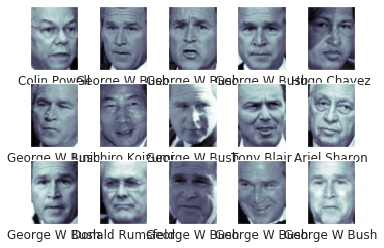

In [3]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [5]:
list_face = []
for fac in faces.images:
    list_face.append(np.ravel(fac))
arr_face = np.array(list_face)
print(arr_face)

[[138.         135.66667    127.666664   ...   1.6666666    1.6666666
    0.33333334]
 [ 71.333336    56.          67.666664   ... 247.66667    243.
  238.33333   ]
 [ 84.333336    97.333336    72.333336   ... 114.         194.33333
  241.        ]
 ...
 [ 29.333334    29.          29.333334   ... 145.         147.
  141.66667   ]
 [ 49.333332    55.666668    76.666664   ... 186.33333    176.33333
  161.        ]
 [ 31.          26.333334    28.         ...  34.          42.
   69.666664  ]]


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
scaler.fit(arr_face)
arr_face

array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
          1.6666666 ,   0.33333334],
       [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
        243.        , 238.33333   ],
       [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
        194.33333   , 241.        ],
       ...,
       [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
        147.        , 141.66667   ],
       [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
        176.33333   , 161.        ],
       [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
         42.        ,  69.666664  ]], dtype=float32)

In [8]:
scaled_face = scaler.transform(arr_face)
scaled_face

array([[ 1.0050244 ,  0.91436267,  0.6292839 , ..., -1.4910041 ,
        -1.4065766 , -1.3338119 ],
       [-0.41931307, -0.8269849 , -0.714991  , ...,  1.6567609 ,
         1.6757917 ,  1.6750889 ],
       [-0.14156726,  0.07647574, -0.61043614, ..., -0.05361006,
         1.0542091 ,  1.7088021 ],
       ...,
       [-1.3166457 , -1.4171487 , -1.5738331 , ...,  0.3430595 ,
         0.4496563 ,  0.45298648],
       [-0.8893445 , -0.8342708 , -0.5133497 , ...,  0.8719522 ,
         0.8243087 ,  0.69740695],
       [-1.2810373 , -1.4754364 , -1.603706  , ..., -1.0772735 ,
        -0.8914294 , -0.45726934]], dtype=float32)

In [13]:
from sklearn.model_selection import train_test_split
X = scaled_face
y = faces.target

stratify = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

In [15]:
Y_tr = np.unique(y_train, return_counts = True)
Y = np.unique(y, return_counts = True)
for k in range(0, len(Y[1])):
    print(Y_tr[1][k] / Y[1][k])
Y_test = np.unique(y_test, return_counts = True)
print(Y_test)

0.7922077922077922
0.8008474576271186
0.8016528925619835
0.8
0.7981651376146789
0.8028169014084507
0.8
0.7986111111111112
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 16,  47,  24, 106,  22,  14,  12,  29]))


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))

[[13  3  0  0  0  0  0  0]
 [ 5 32  1  7  0  0  0  2]
 [ 1  8 13  2  0  0  0  0]
 [ 5 14  6 77  0  0  1  3]
 [ 0  4  9  8  0  0  0  1]
 [ 0  4  2  3  0  4  0  1]
 [ 2  3  0  1  0  0  6  0]
 [ 1  6  0 14  1  0  0  7]]


In [20]:
import numpy as np
error_rates = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate = np.mean(pred_i != y_test)
    print(error_rate)
    error_rates.append(error_rate)

0.42962962962962964
0.45555555555555555
0.43703703703703706
0.4222222222222222
0.4222222222222222
0.4
0.42592592592592593
0.44814814814814813
0.43703703703703706
0.43333333333333335
0.4185185185185185
0.40370370370370373
0.4
0.42592592592592593


In [17]:
np.unique?